<a href="https://colab.research.google.com/github/JFernandees/Data_science/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análise dos Dados do Airbnb - *Torondo - Canadá*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Toronto do Canadá, e ver quais insights podem ser extraídos a partir de dados brutos.**



<center><img alt="Analisando Airbnb" width="30%" src="https://images.pexels.com/photos/3536510/pexels-photo-3536510.jpeg?cs=srgb&dl=pexels-harrison-haines-3536510.jpg&fm=jpg"></center>

*Toronto*, a capital da província de Ontário, é uma grande cidade canadense localizada ao longo da costa noroeste do Lago Ontário. Ela é uma metrópole dinâmica com um centro de arranha-céus imponentes, todos ofuscados pela famosa Torre CN. *Toronto* também tem muitos espaços verdes, incluindo desde o oval Queen’s Park até o High Park, com 400 acres de área, além de trilhas, instalações esportivas e um jardim zoológico.

Sobre as regulamentações, de acordo com a Lei de Locação de Curta Duração da Cidade de *Toronto* **(PG24.8)**, as locações de curta duração são permitidas em *Toronto* se o seu anúncio for sua residência principal. Os anfitriões são obrigados a se registrar na cidade, pagar o imposto e colocar seu número de registro em sua listagem, ou reivindicar um motivo válido para a isenção, a fim de cumprir a portaria.

Anúncios sem um número de registro válido ou isenção postado serão impedidos de hospedar estadias de curta duração (menos de 28 noites por vez) em Toronto.

## Importação dos pacotes e obtenção dos dados.

Estes são todos os pacotes que usaremos.

In [ ]:
# Manipulação de dados 
import pandas as pd

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline 

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/canada/on/toronto/2022-09-07/visualisations/listings.csv')

## Análise dos dados.

**Dicionário das variáveis**

* `id` - Identificador exclusivo do Airbnb para o imóvel 
* `name` - Nome do imóvel
* `host_id` - Identificador exclusico do Airbnb para o anfitrião
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - Não possuei nenhum valor válido 
* `neighbourhood` - Bairro
* `latitude` - Coordenada da latitude da propriedade
* `longitude` - Coordenada da longitude da propriedade
* `room_type` - Tipo de quarto
* `price` - Preço da diária do imóvel 
* `minimum_nights` - Número mínimo de noites para alugar o imóvel
* `number_of_reviews` - Número de avaliações do imóvel
* `last_review` - Data da última avaliação
* `reviews_per_month` - Avaliações por mês
* `calculated_host_listings_count` - Quantidade de listagem de imóveis que o anfitrião possui na região
* `availability_365` - Número de dias que o imóvel estará disponível nos próximos 365 dias
* `number_of_reviews_ltm` - Quantidade de avaliações nos último 12 meses
* `license` - Licença de acordo com a lei de aluguéis de curto prazo

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas e o tipo de suas *variáveis* .

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,27640141,Fibre internet*Monthly Discount*Character House,2343887,Liora,NaN,Dovercourt-Wallace Emerson-Junction,43.66434,-79.42496,Entire home/apt,90,28,47,2022-06-13,0.95,2,145,4,NaN
1,27647117,Cozy studio in an amazing neighbourhood!,96809956,Alexandra,NaN,Playter Estates-Danforth,43.67943,-79.34853,Entire home/apt,45,28,4,2021-02-06,0.08,1,0,0,NaN
2,27826009,Downtown condo,17410774,Brianne,NaN,Waterfront Communities-The Island,43.64698,-79.39121,Entire home/apt,130,28,2,2018-09-09,0.04,1,0,0,NaN
3,27647509,Dundas west subway station apartment BEST LOCA...,179249078,Rosana,NaN,High Park North,43.65953,-79.45416,Private room,80,28,9,2019-03-20,0.19,1,0,0,NaN
4,27653375,Exquisite 1200 sqft 3BR + Den in core-downtown,135718015,Ayk,NaN,Waterfront Communities-The Island,43.64126,-79.38277,Entire home/apt,1999,28,20,2021-06-24,0.42,37,179,0,STR-2204-HLPVHK


In [ ]:
# identificar o volume de dados do DataFrame
print(f'Colunas: {df.shape[1]}')
print(f'Linhas: {df.shape[0]}\n')
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Colunas: 18
Linhas: 16035



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

## Exploração de dados.

Ao explorar nosso conjunto de dados e seus recursos, temos muitas opções disponíveis. Podemos explorar cada recurso individualmente ou comparar pares de recursos, encontrando a correlação entre eles.


### Análise dos outliers

Irei dividir os dados em categóricos e númericos para iniciar a análise .

In [ ]:
# Descrevendo os dados númericos
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.603500e+04,1.603500e+04,0.0,16035.000000,16035.000000,16035.000000,16035.000000,16035.000000,12640.000000,16035.000000,16035.000000,16035.000000
mean,1.415557e+17,1.448429e+08,NaN,43.684916,-79.396946,205.232679,25.197630,27.801497,1.445146,5.448145,139.112317,7.625569
std,2.677914e+17,1.410097e+08,NaN,0.052253,0.071079,349.268699,37.165404,55.838458,1.900710,13.894427,134.301950,16.312252
min,1.419000e+03,1.565000e+03,NaN,43.573810,-79.653650,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.067456e+07,2.527900e+07,NaN,43.646021,-79.426990,80.000000,3.000000,1.000000,0.190000,1.000000,0.000000,0.000000
50%,3.832875e+07,9.448940e+07,NaN,43.664550,-79.396650,130.000000,28.000000,6.000000,0.670000,1.000000,90.000000,1.000000
75%,5.336650e+07,2.420599e+08,NaN,43.710365,-79.373120,226.000000,28.000000,28.000000,2.000000,4.000000,276.000000,6.000000
max,7.102781e+17,4.783676e+08,NaN,43.860710,-79.102200,13164.000000,1125.000000,828.000000,13.470000,129.000000,365.000000,165.000000


In [ ]:
# Descrevendo os dados categóricos 
df.describe(include=['O'])

,name,host_name,neighbourhood,room_type,last_review,license
count,16033,16033,16035,16035,12640,6488
unique,15623,5031,140,4,1892,4489
top,✈︎Fully-Equipped 2-BR Condo in DT Toronto✈︎,Sky View,Waterfront Communities-The Island,Entire home/apt,2022-09-05,Exempt
freq,22,129,2754,10921,546,232


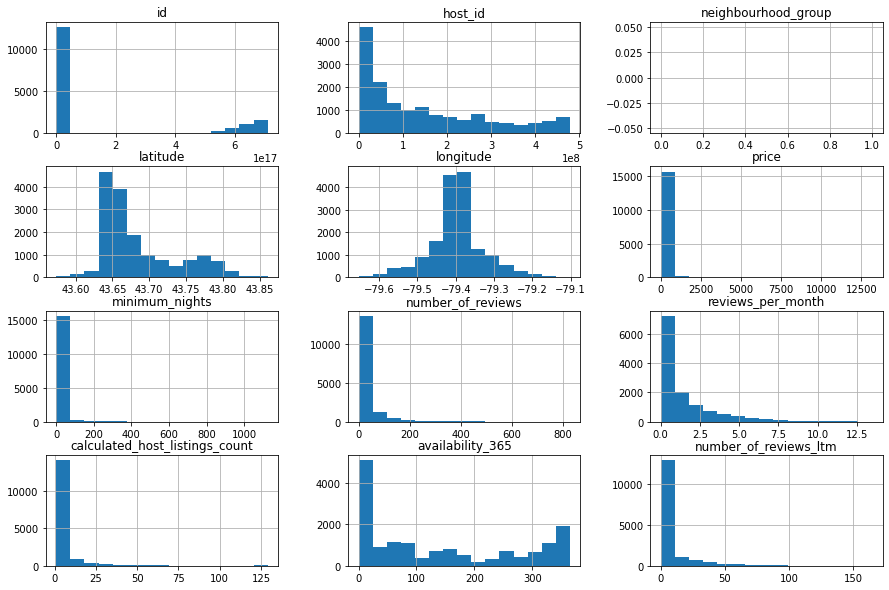

In [ ]:
# Plotando a distribuição de cada dado.
df.hist(bins=15, figsize=(15,10));

Com base na estatísticas descritivas dos dados e em seu histograma de distribuição. Notamos a existência de outliers nas coluna *'price'* e *'minimum_nights'*

### Análise dos dados faltantes.

Os dados faltantes são linhas que estão faltando um valor ou possuem NAN como dado.

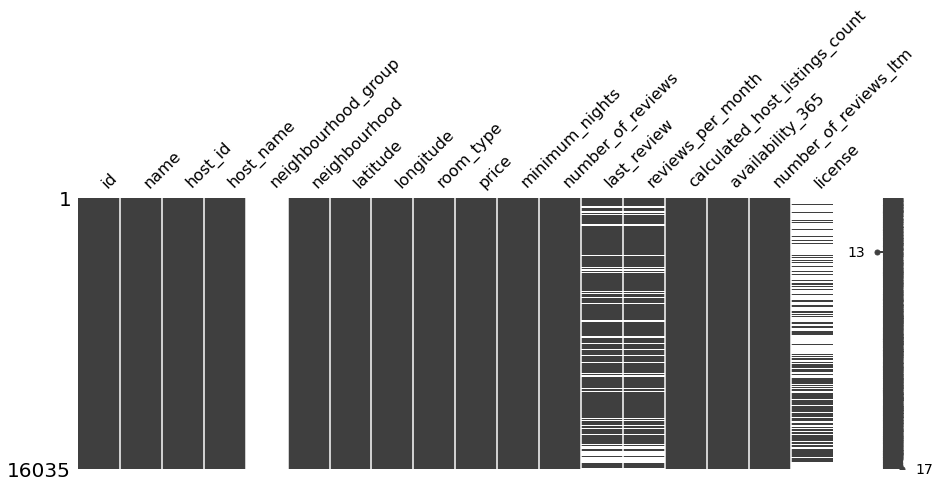

In [ ]:
# Plotarei um gráfico que mostra os valores ausentes
msno.matrix(df, figsize = (15,5));

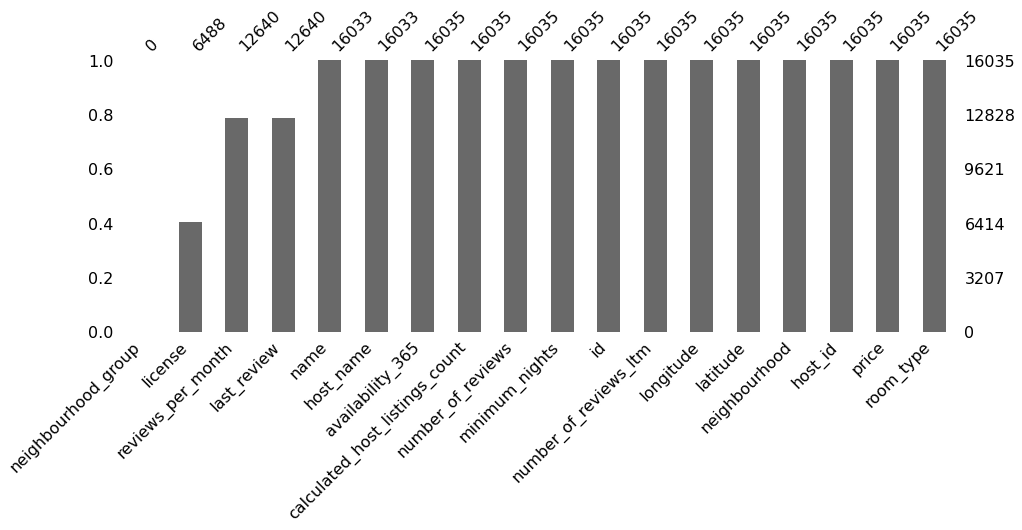

In [ ]:
# Plotarei um gráfico que mostra a quantidde de dados 
msno.bar(df, sort='ascending', figsize=(15,5));

In [ ]:
# Porcentagem de dados ausentes
(df.isnull().sum() / df.shape[0]*100).sort_values(ascending=False)

neighbourhood_group               100.000000
license                            59.538510
reviews_per_month                  21.172435
last_review                        21.172435
host_name                           0.012473
name                                0.012473
number_of_reviews                   0.000000
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
id                                  0.000000
minimum_nights                      0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
price                               0.000000
dtype: float64

Portanto, podemos notar dados ausentes nas colunas *neighbourhood_group, license, reviews_per_month, last_review, host_name e name*.

A coluna *license* possui 59,5% de dados ausentes, porém esses dados ausentes tem um significado. Significam que 59,5% dos imóveis não possuem nenhum tipo de licença. Tornando-se uma informação útil para futuras análises.

## Limpeza dos dados.

**Limpeza**: Para limpar nossos dados, trabalharemos com:

- Valores ausentes: omita elementos de um conjunto de dados que contenham valores ausentes ou impute-os (preencha-os).

- Outliers: Devem ser detectados, mas não necessariamente removidos. A sua inclusão na análise é uma decisão estatística.

In [ ]:
# criando um dataframe para a limpeza
df_clean = df.copy()

### Limpando dados ausentes.

Como notado nas análises a cima, para tratar os valores ausentes iremos exlcuir a coluna *neighbourhood_group* por não possuir nenhum dado e as colunas *reviews_per_month, last_review* porque não serão usadas em análises.

In [ ]:
# Exluindo colunas
df_clean.drop(columns=['reviews_per_month', 'last_review','neighbourhood_group'], inplace=True)
# Excluindo dados ausentes
df_clean.dropna(subset=['name', 'host_name'], inplace=True)

Conferindo os dados após limpeza

In [ ]:
# Verificando se ainda possui dados ausentes(com exceção coluna 'license')
df_clean.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           9544
dtype: int64

### Limpando outliers.

Para tratar dos outliers desse conjunto de dados, plotar boxplots e calcular os limites utilizando a regra do IQR Score.

Inicialemente para tratar os outliers vamos seguir os seguintes passos:

Definir o Q1 e Q3 para as variáveis que serão limpas.
Calcular o IQR para as variáveis.
Definir o limite superior e inferior para cortar os outliers.
Remover os outliers.

In [ ]:
# Identificando os outliers para a coluna price
q1 = df_clean.price.quantile(.25)
q3 = df_clean.price.quantile(.75)
iqr = q3 - q1

# Definindo os limites
supl_price = q3 + 1.5 * iqr
infl_price = q1 - 1.5 * iqr

print(f'O limite superior é {supl_price}')
print(f'O limite inferior é {infl_price}')


O limite superior é 445.0
O limite inferior é -139.0


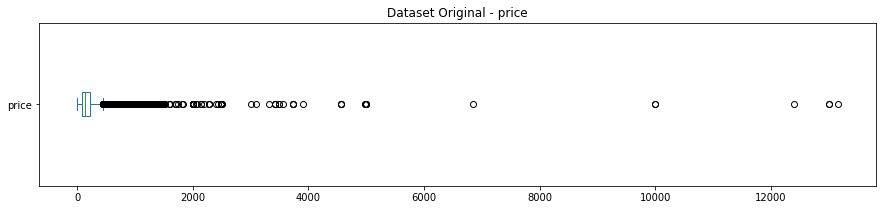

O dataset possui 16031 entradas
O dataset possui 1326 entradas acima do 445.0 limite superior
Representando 8.27% do dataset


In [ ]:
# Plotanto o boxplot para price
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - price')
plt.show()

print(f'O dataset possui {df_clean.shape[0]} entradas')
print(f'O dataset possui {df_clean[df_clean.price > supl_price].shape[0]} entradas acima do {supl_price} limite superior')
print(f'Representando {(df_clean[df_clean.price > supl_price].shape[0])/ df_clean.shape[0]*100:.2f}% do dataset')

In [ ]:
# Identificando os outliers para a coluna minimum_nights
q1_mn = df_clean.minimum_nights.quantile(.25)
q3_mn = df_clean.minimum_nights.quantile(.75)
iqr_mn = q3_mn - q1_mn

# Definindo os limites
supl_minimum_nights = q3_mn + 1.5 * iqr_mn
infl_minimum_nights = q1_mn - 1.5 * iqr_mn

print(f'O limite superior é {supl_minimum_nights}')
print(f'O limite inferior é {infl_minimum_nights}')


O limite superior é 65.5
O limite inferior é -34.5


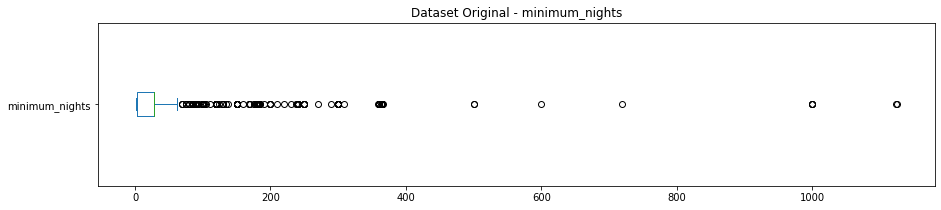

O dataset possui 16031 entradas
O dataset possui 511 entradas acima do 65.5 limite superior
Representando 3.19% do dataset


In [ ]:
# Plotanto o boxplot para price
fig, ax = plt.subplots(figsize=(15,3))
df_clean.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Original - minimum_nights')
plt.show()

print(f'O dataset possui {df_clean.shape[0]} entradas')
print(f'O dataset possui {df_clean[df_clean.minimum_nights > supl_minimum_nights].shape[0]} entradas acima do {supl_minimum_nights} limite superior')
print(f'Representando {(df_clean[df_clean.minimum_nights > supl_minimum_nights].shape[0])/ df_clean.shape[0]*100:.2f}% do dataset')

In [ ]:
# Limpando o dataset
df_clean.drop(df_clean[df_clean.price > supl_price].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > supl_minimum_nights].index, axis=0, inplace=True)

# Vamos também deletar os dados da coluna *price* que possuem valor **0**, porque nenhum imóvel é alugado pelo preço de 0
df_clean.drop(df_clean.index[df_clean.price == 0], inplace=True)

print(f'Tamanho do dataframe antes da limpeza {df.shape}')
print(f'Tamanho do dataframe depois da limpeza {df_clean.shape}')

Tamanho do dataframe antes da limpeza (16035, 18)
Tamanho do dataframe depois da limpeza (14215, 15)


#### Histograma sem outliers

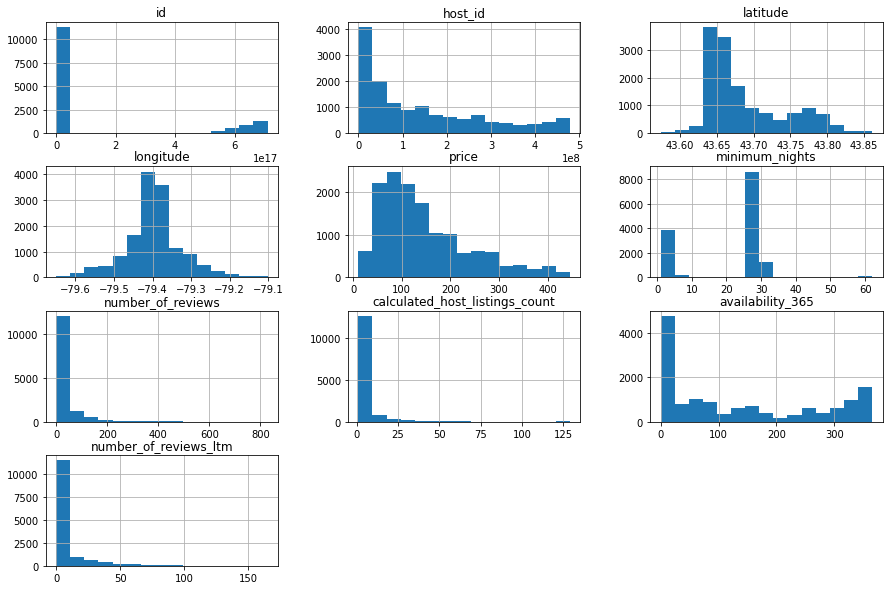

In [ ]:
# Plotar o histrograma sem os outliers
df_clean.hist(bins=15, figsize=(15,10));

## Correlação entre as variáveis.

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.



In [ ]:
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews',
    'calculated_host_listings_count', 'availability_365','latitude', 'longitude']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,latitude,longitude
price,1.000000,-0.226010,0.043298,0.127907,0.103297,-0.266167,0.002327
minimum_nights,-0.226010,1.000000,-0.222806,0.084168,-0.102300,-0.088961,-0.017885
number_of_reviews,0.043298,-0.222806,1.000000,-0.073252,-0.024117,-0.101163,-0.006346
calculated_host_listings_count,0.127907,0.084168,-0.073252,1.000000,0.061195,-0.034028,0.025935
availability_365,0.103297,-0.102300,-0.024117,0.061195,1.000000,0.144631,0.014861
latitude,-0.266167,-0.088961,-0.101163,-0.034028,0.144631,1.000000,0.314093
longitude,0.002327,-0.017885,-0.006346,0.025935,0.014861,0.314093,1.000000


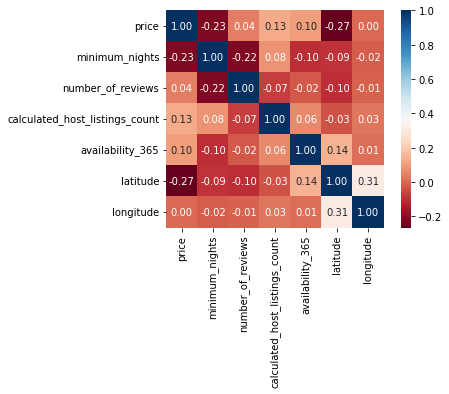

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

## Qual o tipo de imóvel mais alugado no Airbnb?

In [ ]:
# Tipos de imóveis anuciados no Airbnb
df_clean.room_type.value_counts()

Entire home/apt    9318
Private room       4749
Shared room         145
Hotel room            3
Name: room_type, dtype: int64

In [ ]:
# Porcentagem de cada tipo de imóvel
df_clean.room_type.value_counts() / df_clean.shape[0] * 100

Entire home/apt    65.550475
Private room       33.408371
Shared room         1.020049
Hotel room          0.021104
Name: room_type, dtype: float64

## Qual a localidade mais cara em Toronto?

In [ ]:
# Quantidade de imóveis por bairros
df_clean.neighbourhood.value_counts()

Waterfront Communities-The Island    2101
Niagara                               500
Annex                                 421
Trinity-Bellwoods                     403
Church-Yonge Corridor                 385
                                     ... 
Elms-Old Rexdale                       13
Edenbridge-Humber Valley               13
Humber Heights-Westmount               13
Kingsway South                          9
Bridle Path-Sunnybrook-York Mills       8
Name: neighbourhood, Length: 140, dtype: int64

In [ ]:
# Verificando a média de preço por bairro
df_clean[['neighbourhood','price']].groupby('neighbourhood').mean().sort_values('price', ascending=False)[:10]

,price
neighbourhood,
Waterfront Communities-The Island,219.300809
Bridle Path-Sunnybrook-York Mills,200.625000
Bay Street Corridor,190.796512
Niagara,187.790000
Beechborough-Greenbrook,178.571429
Casa Loma,168.150943
Moss Park,166.255014
Mimico (includes Humber Bay Shores),165.679775
Annex,165.147268


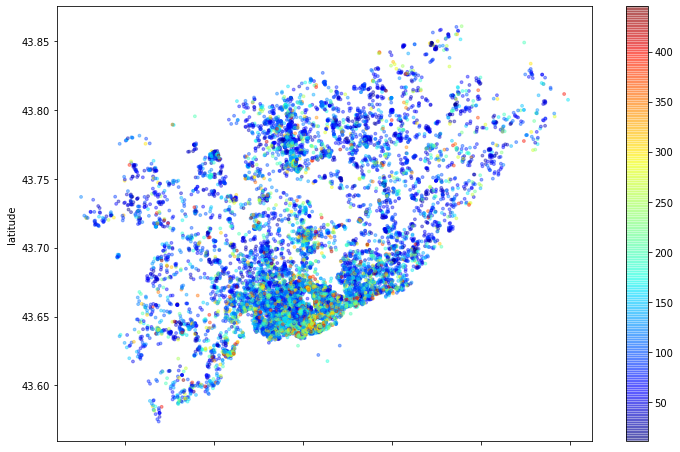

In [ ]:
# plotando os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Por quantos dias os imóveis tendem a ser alugados com mais frequência?

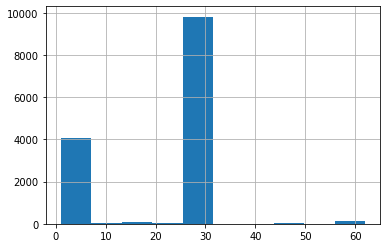

In [ ]:
# Plotando o histograma
df_clean.minimum_nights.hist();

In [ ]:
# Quantitativo de quantos imoveis foram alugados para cada quantidade de dias 
df_clean.minimum_nights.value_counts()[:10]

28    8205
1     1705
2     1158
30    1007
3      614
29     382
31     224
5      197
4      185
7      169
Name: minimum_nights, dtype: int64

## Conclusão

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém podemos perceber a presença de outliers e dados ausentes no dataframe.

Também podemos notar que os tipos de imóveis mais alugado são as ***casas/ap*** e a localidade mais cara acabou sendo ***Waterfront Communities-The Island***. 

Vale ressaltar também que os imóveis em Toronto tendem a ser alugados por ***28 à 30*** ***dias*** com mais frequência. Isso ocorre porque o *regulamento de alugueis de curto prazo* só se aplicam a alugueis de menos de **28 dias**, portanto, para evitar esse regulamentação os imóveis são alugados com mais de **28 dias**, assim se tornando isentos dessa regulamentação e não sendo necessário que o imóvel possua uma licença. Isso explica o porque de vários valores ausentes no dataset ***license ***.

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.






